In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

import h5py
import sys
sys.path.append('../')
import analysis_utils as utils

yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:441: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:443: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV, $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:448: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:450: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps

In [23]:
import importlib
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:441: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:443: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV, $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:448: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:450: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps

<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py'>

## Calibration

In [35]:
folder = r'/Volumes/LaCie/pulse_calibration/20241101_10e'
datasets = ['20241101_dg_10e_1v', '20241101_dg_10e_3v', '20241101_dg_10e_5v', '20241101_dg_10e_7v', '20241101_dg_10e_9v']
pulseamps = np.asarray([118, 389, 641, 919, 1175])

unnormalized_amps = utils.get_all_unnormalized_amps(folder, datasets, pulseamps, False)

20241101_dg_10e_1v
20241101_dg_10e_3v
20241101_dg_10e_5v
20241101_dg_10e_7v
20241101_dg_10e_9v


In [36]:
unnormalized_amps = [amps[~np.isnan(amps)] for amps in unnormalized_amps]
hhs, bcs, gps = utils.fit_amps_gaus(unnormalized_amps)

amp2kevs = [(pulseamps[i] / gps[i][1]) for i in range(len(pulseamps))]
# Take the average of 700 and 900 kev cases
amp2kev = np.mean(np.asarray(amp2kevs[-1:]))

normalized_amps = [amp * amp2kev for amp in unnormalized_amps]

(0.0, 2500.0)

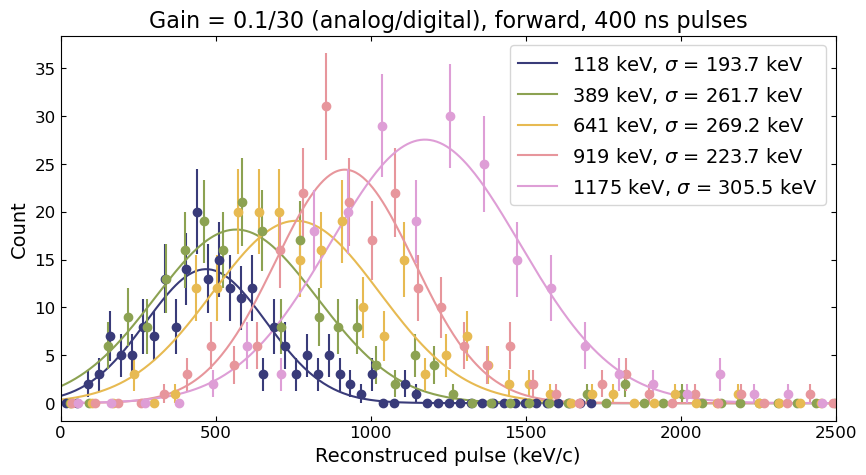

In [37]:
fig, ax = utils.plot_gaus_fit(pulseamps, normalized_amps, hhs, bcs, gps, amp2kev=amp2kev, title='Gain = 0.1/30 (analog/digital), forward, 400 ns pulses')
ax.set_xlim(0, 2500)

In [38]:
print(f'Amplitude to keV converstion factor: {amp2kev}')

Amplitude to keV converstion factor: 12953.113196358565


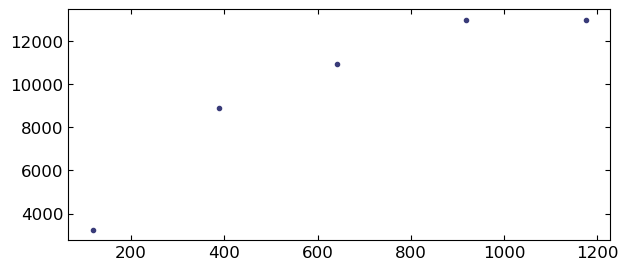

In [39]:
plt.plot(pulseamps, amp2kevs, '.')

Calibration on Nov 11, after the long data is taken

In [31]:
folder = r'/Volumes/LaCie 1/pulse/20241107_10e'
datasets = ['20241107_dg_10e_1v', '20241107_dg_10e_3v', '20241107_dg_10e_5v', '20241107_dg_10e_7v', '20241107_dg_10e_9v']
pulseamps = np.asarray([118, 389, 641, 919, 1175])

unnormalized_amps = utils.get_all_unnormalized_amps(folder, datasets, pulseamps, False)

20241107_dg_10e_1v
20241107_dg_10e_3v
20241107_dg_10e_5v
20241107_dg_10e_7v
20241107_dg_10e_9v


In [32]:
unnormalized_amps = [amps[~np.isnan(amps)] for amps in unnormalized_amps]
hhs, bcs, gps = utils.fit_amps_gaus(unnormalized_amps)

amp2kevs = [(pulseamps[i] / gps[i][1]) for i in range(len(pulseamps))]
# Take the average of 700 and 900 kev cases
amp2kev = np.mean(np.asarray(amp2kevs[-1:]))

normalized_amps = [amp * amp2kev for amp in unnormalized_amps]

(0.0, 2500.0)

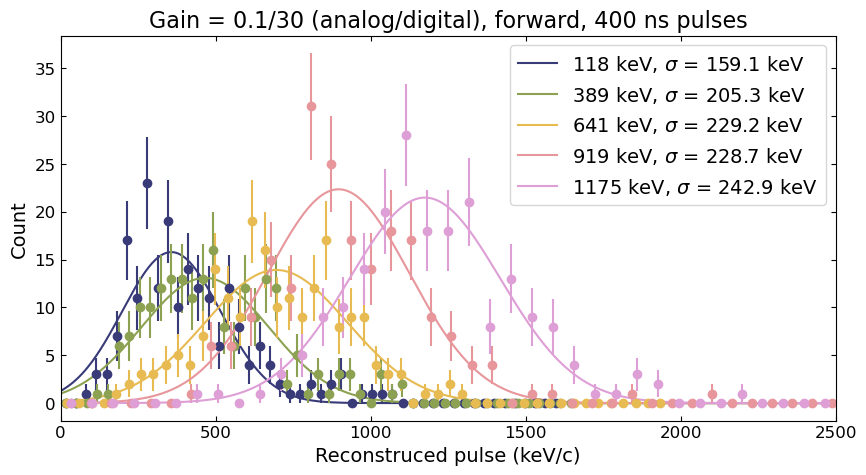

In [33]:
fig, ax = utils.plot_gaus_fit(pulseamps, normalized_amps, hhs, bcs, gps, amp2kev=amp2kev, title='Gain = 0.1/30 (analog/digital), forward, 400 ns pulses')
ax.set_xlim(0, 2500)

In [34]:
print(f'Amplitude to keV converstion factor: {amp2kev}')

Amplitude to keV converstion factor: 11827.828958851922


## DM data

There is a charge change in file 683, so let's focus on the the files until file 682

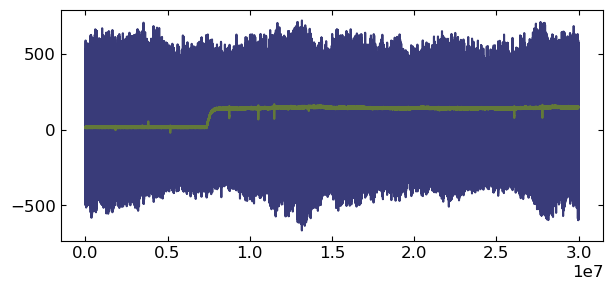

In [97]:
file = r'/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_683.hdf5'
f = h5py.File(file, "r")

plt.plot(f['data']['channel_d'][:] * f['data']['channel_d'].attrs['adc2mv'])
plt.plot(f['data']['channel_e'][:] * f['data']['channel_e'].attrs['adc2mv'])

In [ ]:
bc = None
hhs, good_dets, temps, charge_level = [], [], [], []
for i in range(683):
    f = h5py.File(f'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241101_0e_long/20241101_abcdefg_0e_{i}_processed.hdf5', 'r')
    
    if bc is None:
        bc = f['data_processed'].attrs['bin_center_kev']
    
    hhs.append(f['data_processed']['histogram'][:])
    good_dets.append(f['data_processed']['good_detection'][:])
    temps.append(f['data_processed']['temp'][:])

    f.close()

hhs = np.asarray(hhs)
temps = np.asarray(temps)
good_dets = np.array(good_dets)

: 

Apply cut and separate the histogram in time.

In [237]:
q1, q2, q3 = np.quantile(temps.flatten(), [0.25, 0.5, 0.75])
temp_thr = q2

cold = temps < temp_thr

In [238]:
hhs_cut = [[] for i in range(7)]
for i, hh_file in enumerate(hhs):
    for j, jj in enumerate(hh_file):
        if cold[i, j] and good_dets[i, j]:
            hhs_cut[i//100].append(hhs[i, j])


Text(0.5, 1.0, 'Neutral sphere data, 11.4 hour')

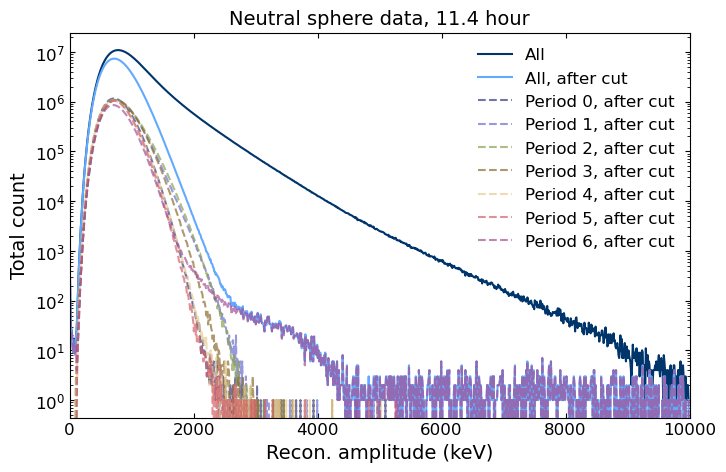

In [248]:

hh_all_sum = np.sum(np.sum(hhs, axis=0), axis=0)

hh_cut_all = hhs[np.logical_and(temps < temp_thr, good_dets)]
hh_cut_all_sum = np.sum(hh_cut_all, axis=0)

plt.subplots(figsize=(8, 5))
plt.plot(bc, hh_all_sum, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc, hh_cut_all_sum, '-', color=yale_colors[2], label='All, after cut', alpha=1)

for i, _hhs in enumerate(hhs_cut):
    hh_cut_time_sum = np.sum(np.asarray(_hhs), axis=0)
    plt.plot(bc, hh_cut_time_sum, '--', label=f'Period {i}, after cut', alpha=0.7)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'Neutral sphere data, {683/60:.1f} hour')

Further investigate the problematic Period 6. The excess events come from Period 6-5 and 6-6.

In [253]:
hhs_cut_p6 = [[] for i in range(9)]
for i, hh_file in enumerate(hhs):
    if i // 100 != 6:
        continue

    for j, jj in enumerate(hh_file):
        if cold[i, j] and good_dets[i, j]:
            hhs_cut_p6[(i-600)//10].append(hhs[i, j])

Text(0, 0.5, 'Total count')

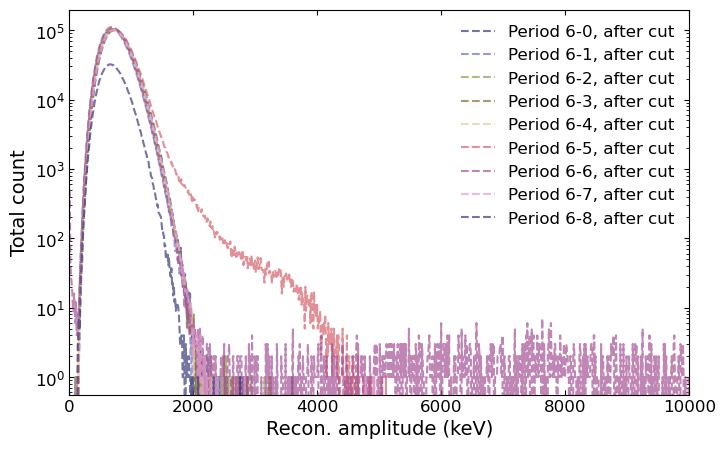

In [258]:
plt.subplots(figsize=(8, 5))

for i, _hhs in enumerate(hhs_cut_p6):
    # if i == 6:
    #     continue
    hh_cut_time_sum = np.sum(np.asarray(_hhs), axis=0)
    plt.plot(bc, hh_cut_time_sum, '--', label=f'Period 6-{i}, after cut', alpha=0.7)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')

It turned out there is only one minute of data that is problematic in 6-5

In [265]:
hhs_cut_p6_5 = [[] for i in range(10)]
file_idx = np.arange(650, 660, 1)

for i in file_idx:
    for j, _hh in enumerate(hhs[i]):
        if cold[i, j] and good_dets[i, j]:
            hhs_cut_p6_5[(i-600)%10].append(hhs[i, j])

Text(0, 0.5, 'Total count')

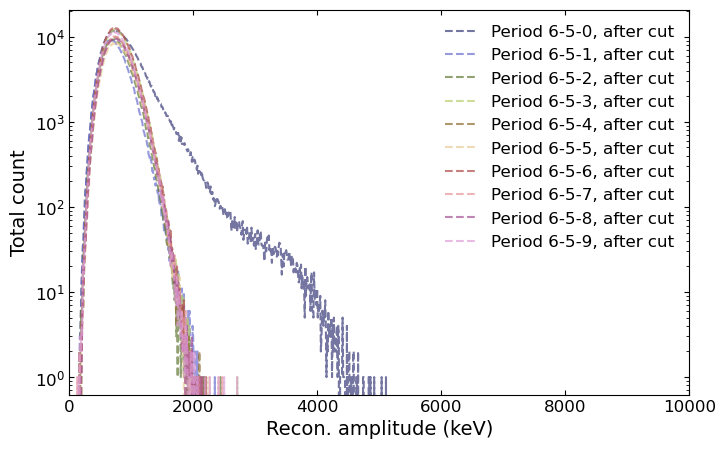

In [272]:
plt.subplots(figsize=(8, 5))

for i, _hhs in enumerate(hhs_cut_p6_5):
    # if i == 0:
        # continue
    hh_cut_time_sum = np.sum(np.asarray(_hhs), axis=0)
    plt.plot(bc, hh_cut_time_sum, '--', label=f'Period 6-5-{i}, after cut', alpha=0.7)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')

In [280]:
hhs_650 = hhs[650]

window_events = []
for j, _hh in enumerate(hhs_650):
    if np.sum(_hh[bc > 4000]) > 0:
        if cold[650, j] and good_dets[650, j]:
            window_events.append(j)

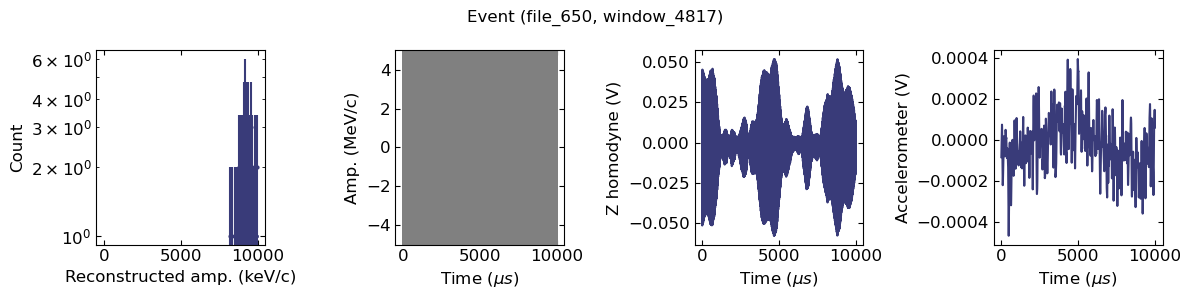

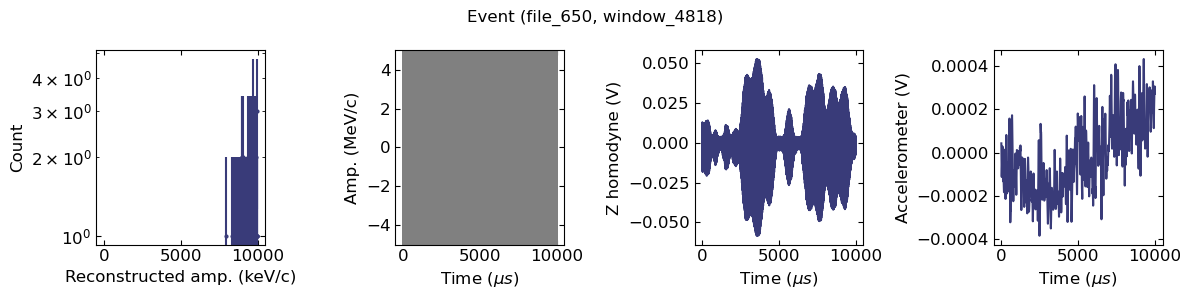

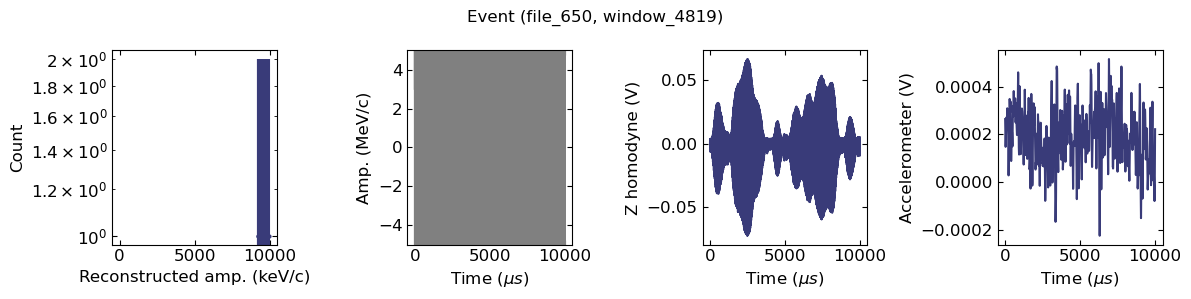

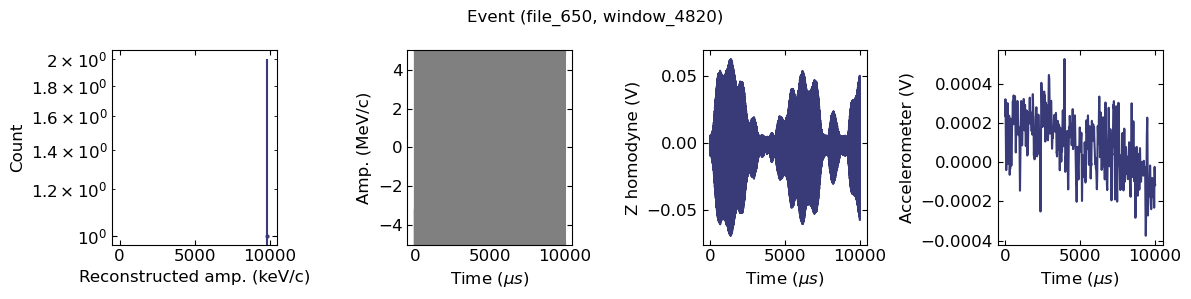

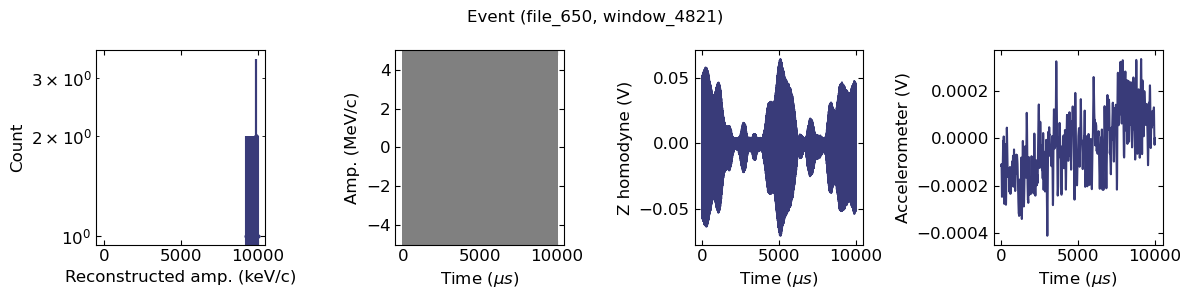

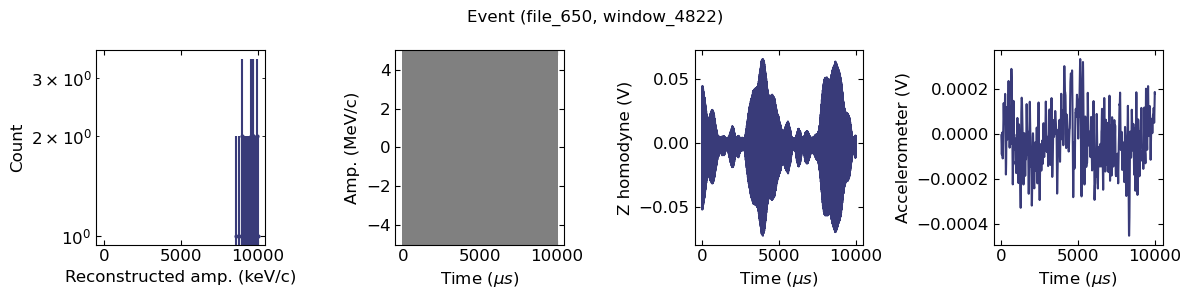

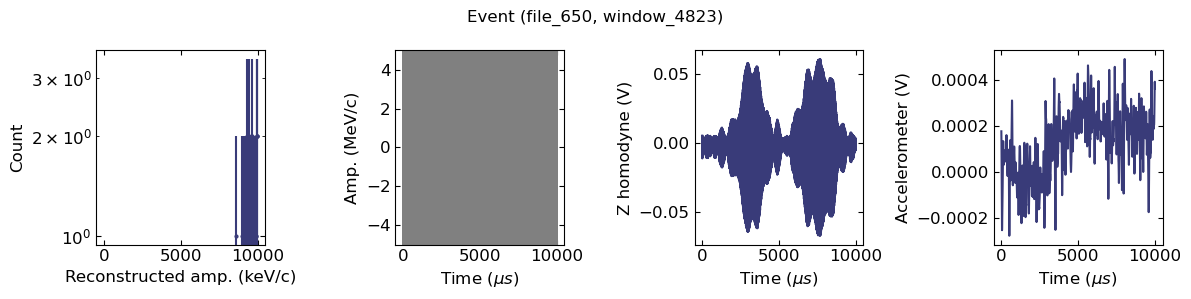

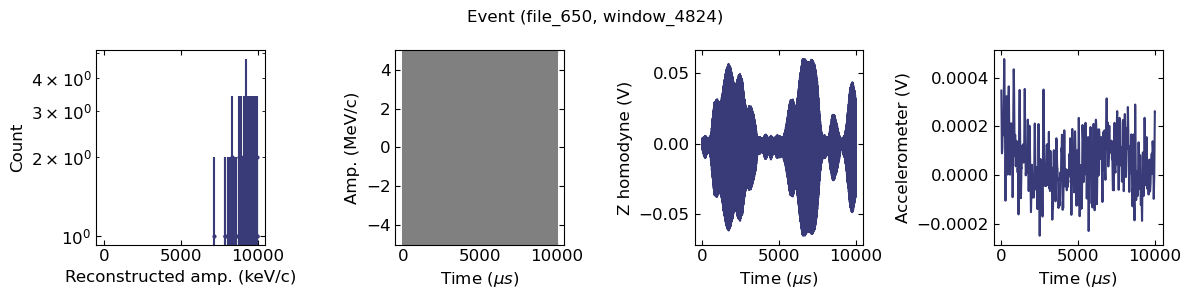

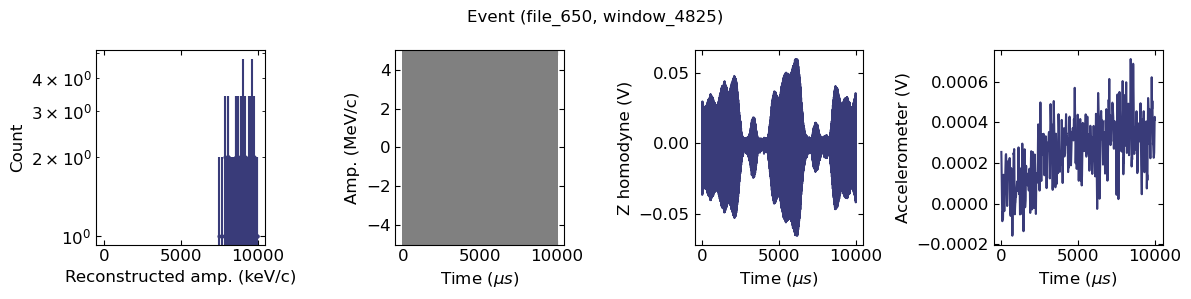

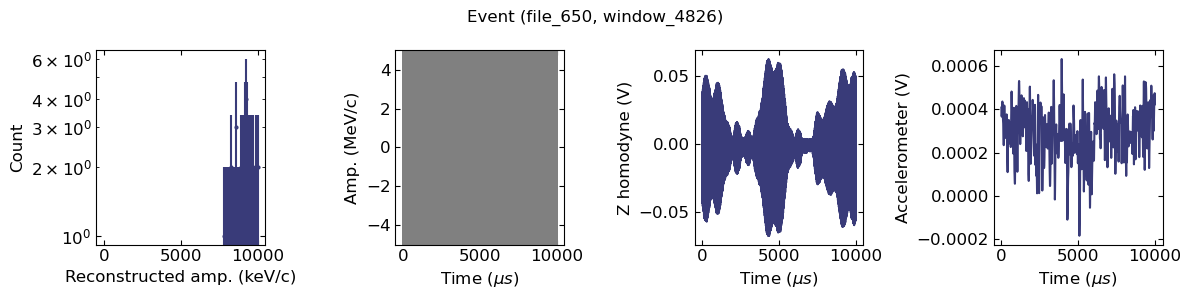

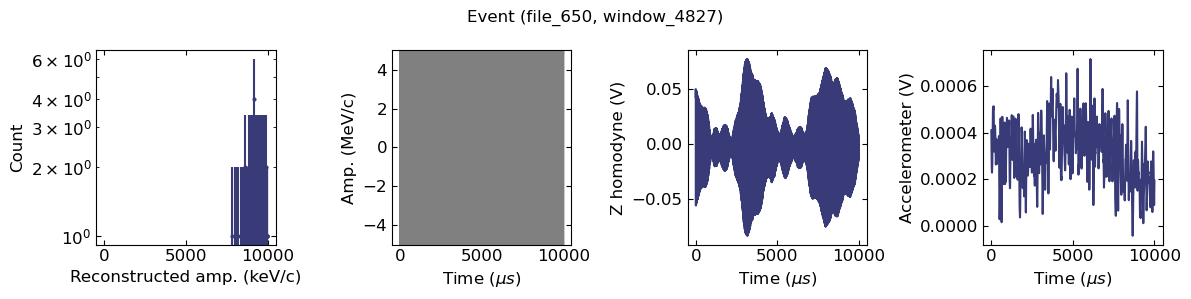

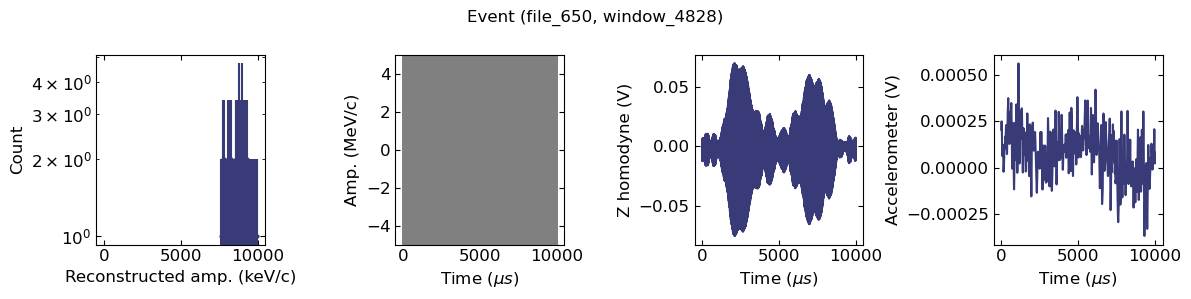

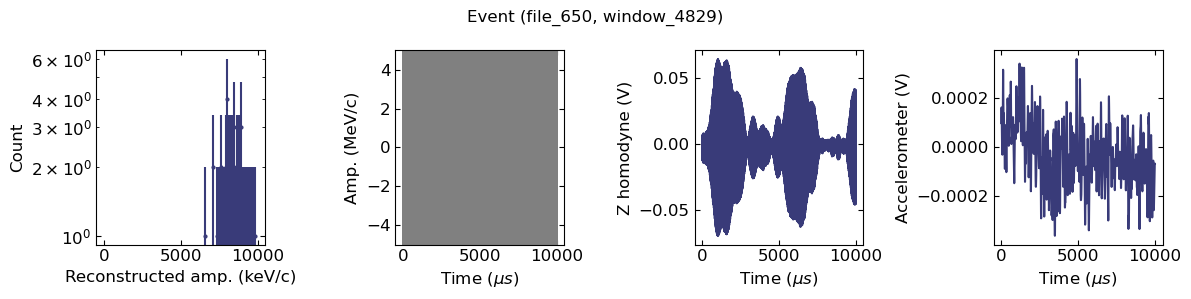

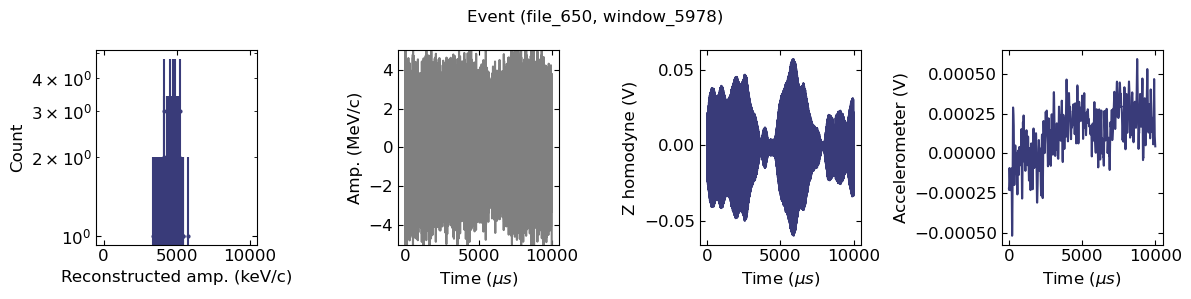

In [282]:
c_mv = 5.522e-08
amp2kev = 12953.113196358565

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241101_0e_long'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for j in window_events:
    i = 650
    _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

There are two kinds of transient events that we want to cut away: the first, e.g. (650, 4817) is homodyne detection losing lock, and the second, e.g. (630, 5978) is the sphere abnormally heated up by something (usually these are cut away by the old temperature cut, but we want to come up with a better strategy)

/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_650.hdf5


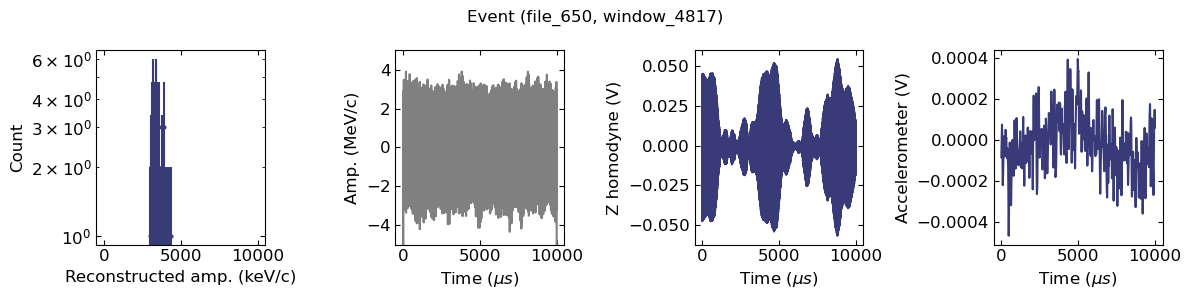

In [348]:
i, j = 650, 4817
amp_lp, hh, zz, zz_bp, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_630.hdf5


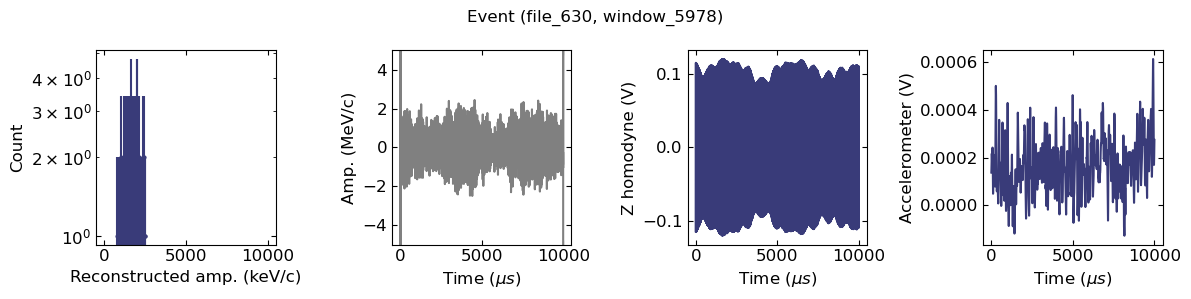

In [341]:
i, j = 630, 5978
amp_lp, hh, zz, zz_bp, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

Here's another interesting situation in which there seems to be some environmental coupling

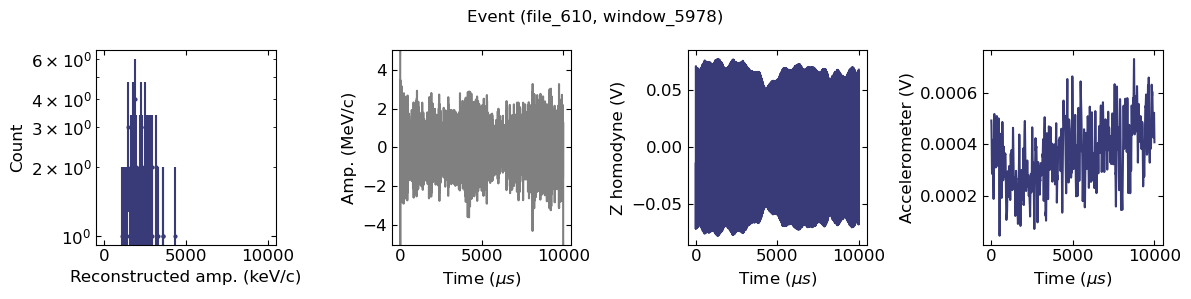

In [ ]:
i, j = 610, 5978
amp_lp, hh, zz, zz_bp, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_640.hdf5


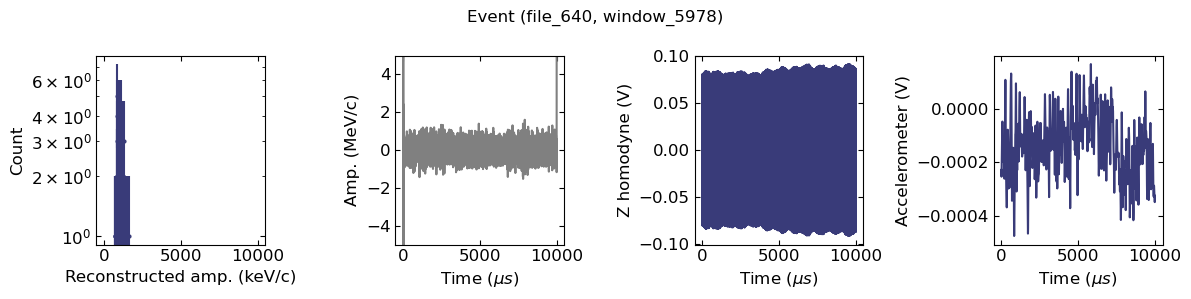

In [352]:
i, j = 640, 5978
amp_lp, hh, zz, zz_bp, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

In [342]:
i, j = 630, 5978
window_length = 5000
bins = np.arange(0, 10000, 10)  # keV

file = f'/Volumes/LaCie/dm_data/20241101_0e_long/20241101_abcdefg_0e_{i}.hdf5'
f = h5py.File(file, "r")

dtt = f['data'].attrs['delta_t']
fs = int(np.ceil(1 / dtt))

zz = f['data']['channel_d'][:] * f['data']['channel_d'].attrs['adc2mv'] / 1e3
zz_bp = utils.bandpass_filtered(zz, fs, 30000, 80000)

zz_shaped = np.reshape(zz, (int(zz.size / window_length), window_length))
zz_bp_shaped = np.reshape(zz_bp, (int(zz_bp.size / window_length), window_length))

_amp, amp_lp, temp = utils.recon_force(dtt, zz_bp_shaped[j], c_mv)
amp_search = np.abs(amp_lp[100:-50])
amp_reshaped = np.reshape(amp_search, (int(amp_search.size/25), 25))
amp_searched = np.max(amp_reshaped, axis=1)

hh_all = np.histogram(amp_searched*amp2kev, bins=bins)[0]

In [347]:
np.max(amp_searched*amp2kev)

2497.672114292862

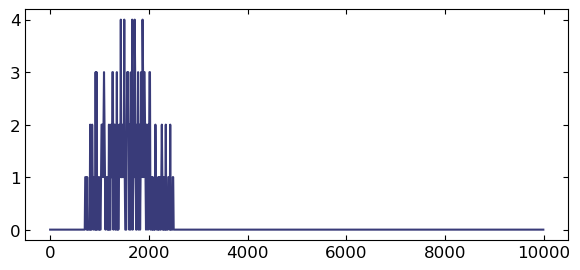

In [344]:
plt.plot(bc, hh_all)

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_2669/893901995.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('Time ($\mu s$)', fontsize=12)


Text(0, 0.5, 'Amp. (MeV/c)')

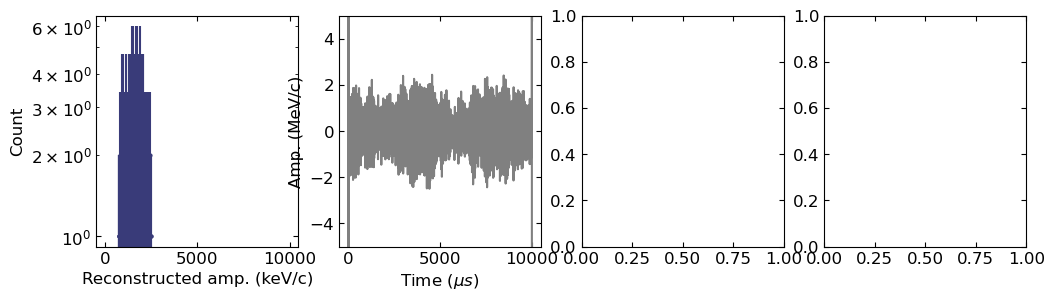

In [336]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].errorbar(bc, hh_all, np.sqrt(hh_all), fmt='o', markersize=2)
ax[0].set_yscale('log')
# ax[0].set_xlim(0, 5000)
#     ax[0].set_ylim(1, 5e4)
ax[0].set_xlabel('Reconstructed amp. (keV/c)', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

ax[1].plot(dtt*1e6*np.arange(0, amp_lp.size), amp_lp*amp2kev/1000, color='grey')
ax[1].set_ylim(-5, 5)
# ax[1].set_ylim(-3, 3)
ax[1].set_xlabel('Time ($\mu s$)', fontsize=12)
ax[1].set_ylabel('Amp. (MeV/c)', fontsize=12)

In [218]:
cold_and_good_events_idx = []
cold_and_good_events_amp = []

threshold = 4000
bc_above_threshold = bc[bc > threshold]

for i, hh_file in enumerate(hhs):
    for j, hh in enumerate(hh_file):
        if np.sum(hh[bc > threshold]) > 0: # reject multiple events
            if temps[i, j] < temp_thr and good_dets[i, j]:
                    bin_idx = np.nonzero(hh[bc > threshold])
                    cold_and_good_events_amp.append(bc_above_threshold[bin_idx])
                    cold_and_good_events_idx.append(np.array([i, j]))

In [219]:
cold_and_good_events_idx

[array([  68, 2848]),
 array([119, 432]),
 array([352, 772]),
 array([ 436, 5150]),
 array([ 476, 5337]),
 array([ 486, 3585]),
 array([ 560, 3402]),
 array([ 589, 3826]),
 array([ 650, 4817]),
 array([ 650, 4818]),
 array([ 650, 4819]),
 array([ 650, 4820]),
 array([ 650, 4821]),
 array([ 650, 4822]),
 array([ 650, 4823]),
 array([ 650, 4824]),
 array([ 650, 4825]),
 array([ 650, 4826]),
 array([ 650, 4827]),
 array([ 650, 4828]),
 array([ 650, 4829]),
 array([ 650, 5978]),
 array([ 666, 5618]),
 array([ 666, 5620]),
 array([ 667, 1628]),
 array([ 667, 1629]),
 array([ 667, 1630]),
 array([ 667, 1631]),
 array([ 667, 1632]),
 array([ 667, 1633]),
 array([ 667, 1634]),
 array([ 667, 1635]),
 array([ 667, 1636]),
 array([ 667, 1637]),
 array([ 667, 1638]),
 array([ 667, 1639]),
 array([ 667, 1640]),
 array([ 667, 1641]),
 array([ 667, 1642]),
 array([ 667, 1643]),
 array([ 667, 1644]),
 array([ 667, 1645]),
 array([ 667, 1646]),
 array([ 667, 1647]),
 array([ 667, 1648]),
 array([ 667, 

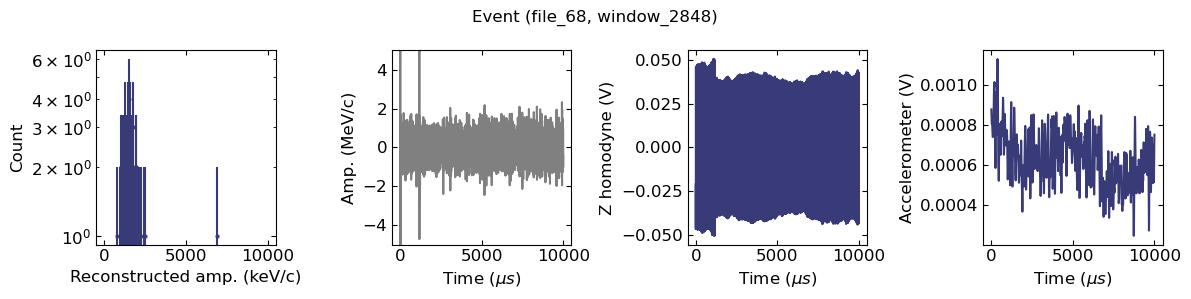

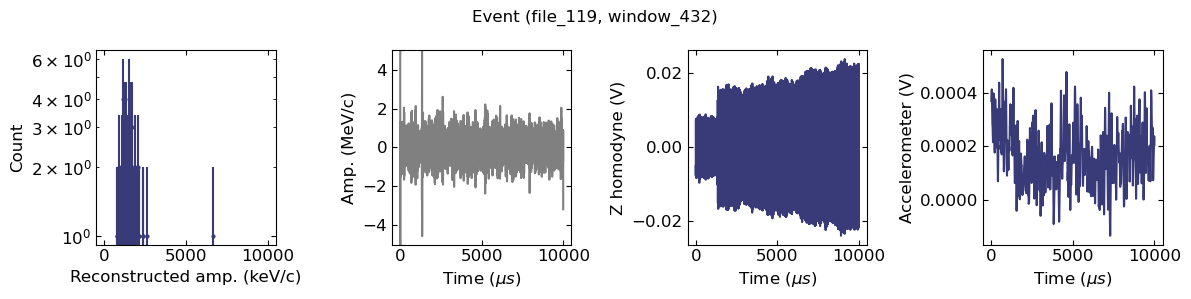

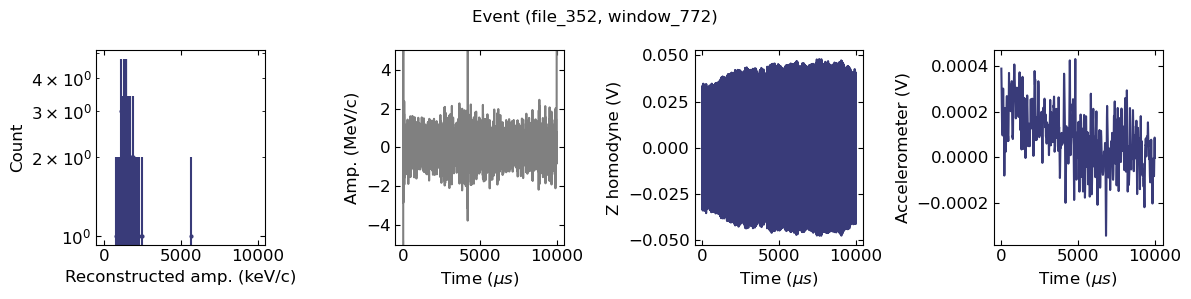

In [212]:
c_mv = 5.522e-08
amp2kev = 12953.113196358565

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241101_0e_long'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in cold_and_good_events_idx:
    _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

In [161]:
import os

out_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241101_0e_long'

combined_path = os.path.join(out_dir, '*.hdf5')
out_files = glob.glob(combined_path)

# old_file = os.path.join("directory", "a.txt")
# new_file = os.path.join("directory", "b.kml")
# os.rename(old_file, new_file)

In [167]:
for i, file in enumerate(out_files):
    idx = int(file.split('_')[-2])
    if idx > 0:
        new_name = os.path.join(out_dir, f'20241101_abcdefg_0e_{idx+5}_processed.hdf5')
        os.rename(file, new_name)

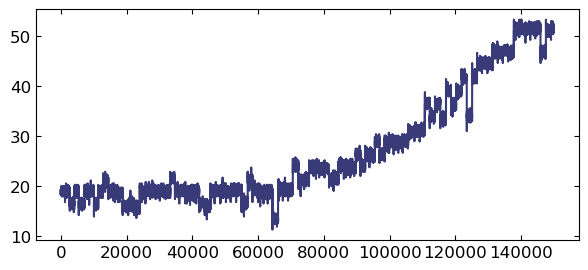

In [111]:
window = np.zeros_like(zz_bp, dtype=np.bool_)

charge_change_idx = 7500000
window[charge_change_idx-200000:charge_change_idx-50000] = True

plt.plot(ee[window])

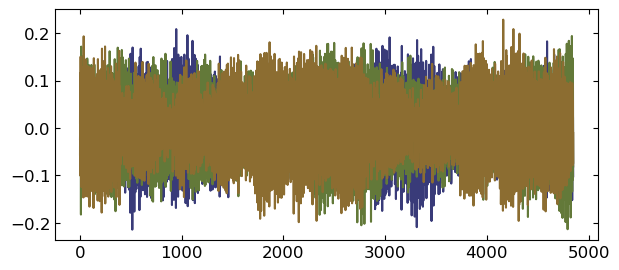

In [117]:
from scipy.fft import rfft, irfft, rfftfreq

c_mv = 5.522e-08

window_length = 5000
bins = np.arange(0, 0.5, 0.01)
bc = 0.5 * (bins[:-1] + bins[1:])

zz_bp_shaped = np.reshape(zz_bp[window], (int(zz_bp[window].size / window_length), window_length))
zz_shaped = np.reshape(zz[window], (int(zz[window].size / window_length), window_length))

hh_all = np.empty(shape=(zz_bp_shaped.shape[0], bc.size), dtype=np.int16)
esig = []
for j, _zz in enumerate(zz_bp_shaped):
    _amp, amp_lp, temp = utils.recon_force(dtt, _zz, c_mv)

    zzk = rfft(zz_shaped[j])
    ff = rfftfreq(zz_shaped[j].size, dtt)

    in_driving_band = np.logical_and(ff>92800, ff<93200)
    esig.append(np.sum(np.abs(zzk[in_driving_band])**2))

    if j > 4 and j < 8:
        plt.plot(amp_lp[100:-50])

    # Divide the reconstructed amplitude in 50 (100 us) index chunks
    # and search
    amp_search = np.abs(amp_lp[100:-50])
    amp_reshaped = np.reshape(amp_search, (int(amp_search.size/50), 50))
    amp_searched = np.max(amp_reshaped, axis=1)

    hh_all[j] = np.histogram(amp_searched, bins=bins)[0]


(4.0, 10.0)

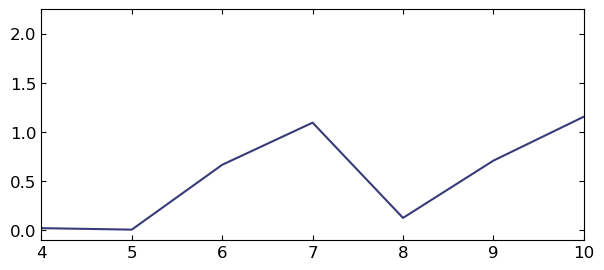

In [116]:
plt.plot(esig)
plt.xlim(4, 10)

<ErrorbarContainer object of 3 artists>

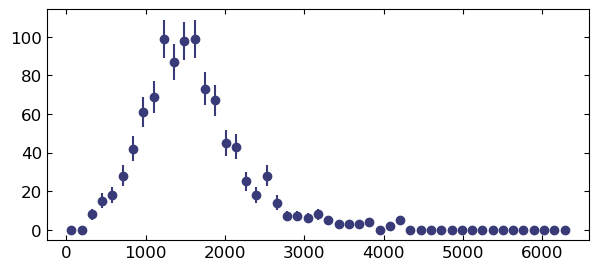

In [92]:
hh_all_sum = np.sum(hhs, axis=0)
plt.errorbar(bc*amp2kev, hh_all_sum, np.sqrt(hh_all_sum), fmt='o')